In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [8]:
bias  =100
X,y,coef = make_regression(n_features =1, bias = bias, random_state = 42, coef= True)

In [9]:
X.shape, y.shape

((100, 1), (100,))

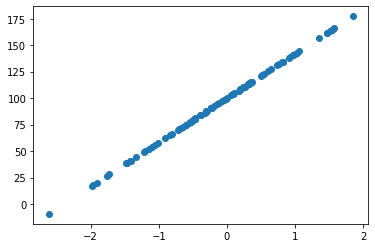

In [10]:
plt.scatter(X,y)

In [12]:
bias  =100
X,y,coef = make_regression(n_features =1,noise = 10,bias = bias, random_state = 42, coef= True)

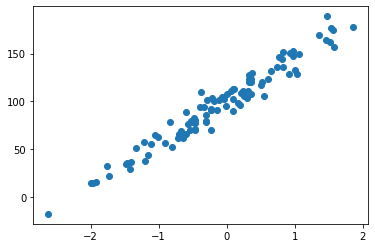

In [13]:
plt.scatter(X,y)

In [14]:
coef # m of the line

array(41.74110031)

In [15]:
bias # c of the line

100

In [16]:
# create a line
y_gen = X*coef + bias

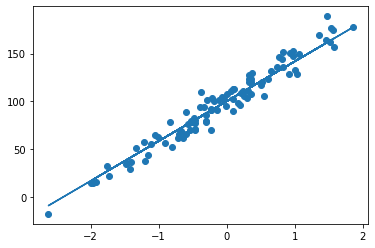

In [17]:
plt.scatter(X,y)
plt.plot(X,y_gen)

In [18]:
# plot a line unsing linear regresssion
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X,y)
# work during training? figuring out m and c

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.coef_, model.intercept_

(array([44.43716999]), 101.16511532052698)

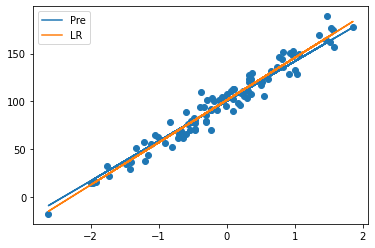

In [25]:
plt.scatter(X,y)
plt.plot(X,y_gen, label="Pre")
plt.plot(X,model.predict(X),label="LR")
plt.legend()

In [42]:
class LinearRegressionCustom:
    #constructor
    def __init__(self,lr=0.1):
        self.lr = lr
        
    def fit(self,X,y):
        self._X = X  #_X for mock behaviour like private
        self._y = y.reshape(-1,1) 
        
        # need to figure out value of coef and intercept
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        # gradient descent
        errors = []
        
        #lets say we do this 50 times
        
        for i in range(50):
            self.gradient_descend()
            errors.append(self.error())
        return errors
    
    def gradient_descend(self):
        #change in coef ad intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept*self.lr
    
    def gradient(self):
        yh = self.predict(self._X)
        
        d_coef = ((yh-self._y)*self._X).mean()
        d_intercept = (yh-self._y).mean()
        
        return d_coef,d_intercept
    
    def predict(self,X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X)-self._y)**2).sum()

In [43]:
model = LinearRegressionCustom(lr=0.1)
errors = model.fit(X,y)
model.coef_, model.intercept_

(43.2651698235885, 100.29816614353253)

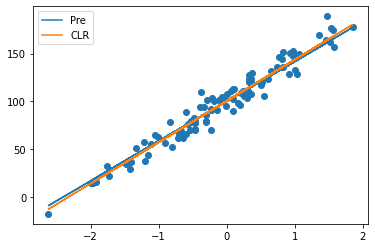

In [44]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

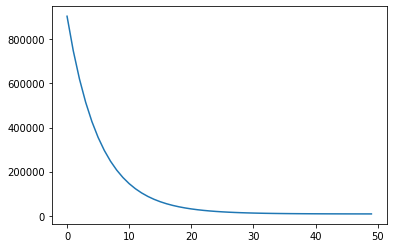

In [45]:
plt.plot(errors)

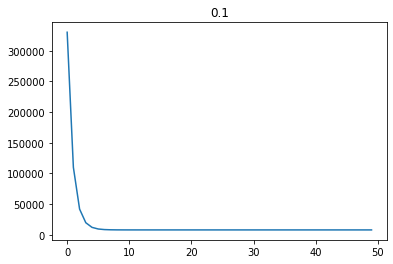

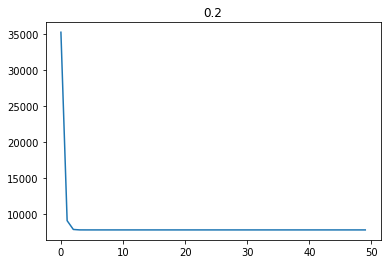

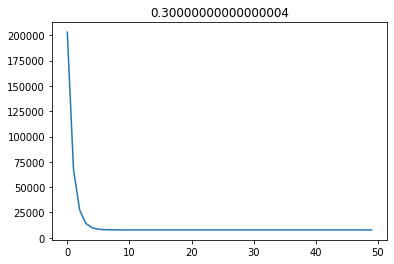

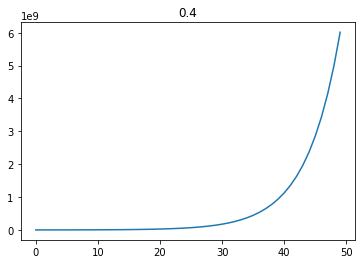

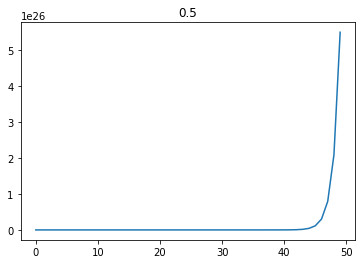

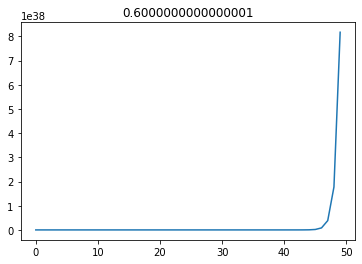

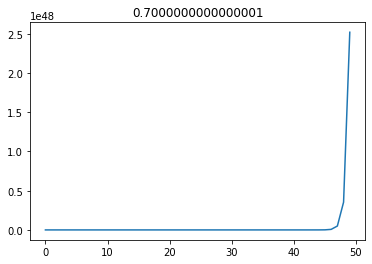

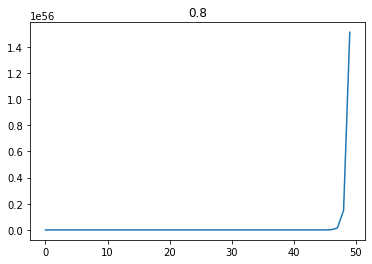

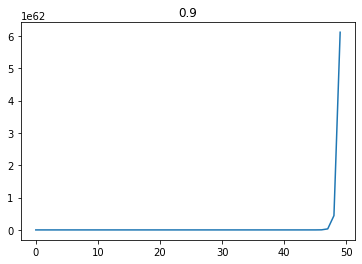

In [47]:
for i in range(1,10):
    model = LinearRegressionCustom(lr =.5*i)  # as we increase the value rate the errors first decrease but then negatively increase
    errors =model.fit(X,y)
    plt.figure()
    plt.title(str(.1*i))
    plt.plot(errors)